In [106]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
import scipy.stats as stats
import statsmodels.api as sms
import statsmodels.formula.api as smsformula 
from statsmodels.formula.api import ols # Creating Anova Table
from statsmodels.stats.multicomp import pairwise_tukeyhsd
pd.set_option('display.max_columns',None)


###   Name Description
ID ID of each client

LIMIT_BAL Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX Gender (1=male, 2=female)

EDUCATION (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE Marital status (1=married, 2=single, 3=others)

AGE Age in years

PAY_1 Repayment status in September, 2005 (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2 Repayment status in August, 2005 (scale same as above)

PAY_3 Repayment status in July, 2005 (scale same as above)

PAY_4 Repayment status in June, 2005 (scale same as above)

PAY_5 Repayment status in May, 2005 (scale same as above)

PAY_6 Repayment status in April, 2005 (scale same as above)

BILL_AMT1 Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2 Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3 Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4 Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5 Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6 Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1 Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2 Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3 Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4 Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5 Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6 Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month Default payment (1=yes, 0=no)

In [188]:
df=pd.read_csv(r"C:\Users\9808222113\Downloads\credit_altered.csv")

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT,RISK_VALUE,BILL_VALUE
0,1,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,-3102
1,2,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,-11395
2,3,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,-66396
3,4,50000,Female,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,-176956
4,5,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,-42352


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
ID              30000 non-null int64
LIMIT_BAL       30000 non-null int64
SEX             30000 non-null object
EDUCATION       30000 non-null object
MARRIAGE        30000 non-null object
AGE             30000 non-null int64
PAY_SEP         30000 non-null int64
PAY_AUG         30000 non-null int64
PAY_JUL         30000 non-null int64
PAY_JUN         30000 non-null int64
PAY_MAY         30000 non-null int64
PAY_APR         30000 non-null int64
BILL_AMT_SEP    30000 non-null int64
BILL_AMT_AUG    30000 non-null int64
BILL_AMT_JUL    30000 non-null int64
BILL_AMT_JUN    30000 non-null int64
BILL_AMT_MAY    30000 non-null int64
BILL_AMT_APR    30000 non-null int64
PAY_AMT_SEP     30000 non-null int64
PAY_AMT_AUG     30000 non-null int64
PAY_AMT_JUL     30000 non-null int64
PAY_AMT_JUN     30000 non-null int64
PAY_AMT_MAY     30000 non-null int64
PAY_AMT_APR     30000 non-null int64


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_SEP,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_AUG,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_JUL,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_JUN,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_MAY,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0
PAY_APR,30000.0,-0.291100,1.149988,-2.0,-1.00,0.0,0.00,8.0
BILL_AMT_SEP,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0


In [7]:
print('Unique Values : ',df.SEX.unique())
print('Unique Values :',df.EDUCATION.unique())
print('Unique Values :',df.MARRIAGE.unique())

Unique Values :  ['Female' 'Male']
Unique Values : ['University' 'Graduate' 'High School' 'Unknown' 'Others']
Unique Values : ['Married' 'Single' 'Others' 'Unknown']


,ID,AGE,LIMIT_BAL,PAY_APR,BILL_AMT_APR,PAY_AMT_APR,BILL_AMT_AUG,DEFAULT,RISK_VALUE,BILL_VALUE
0,1,24,20000,-2,0,0,3102,1,-2,-3102
1,2,26,120000,2,3261,2000,1725,1,3,-11395
2,3,34,90000,0,15549,5000,14027,0,0,-66396
3,4,37,50000,0,29547,1000,48233,0,0,-176956
4,5,57,50000,0,19131,679,5670,0,-2,-42352


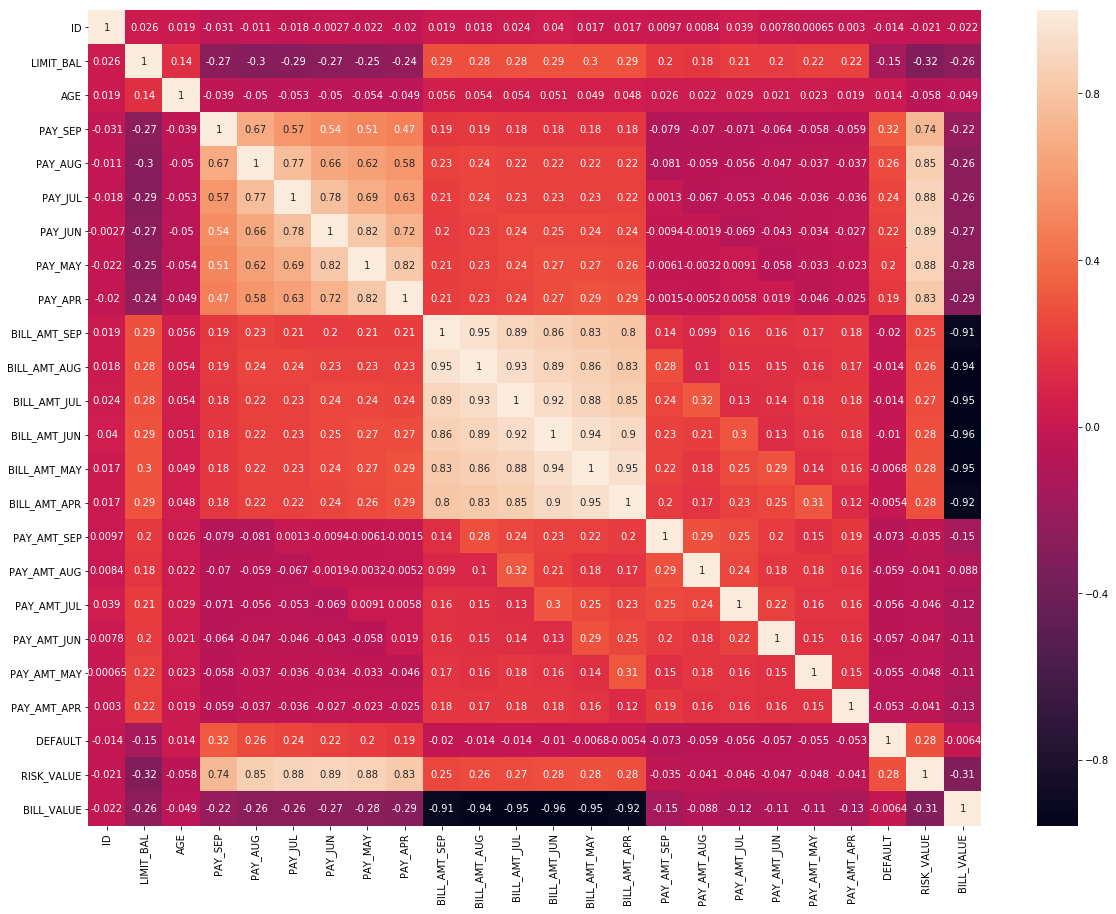

In [92]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

C:\Users\9808222113\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\9808222113\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


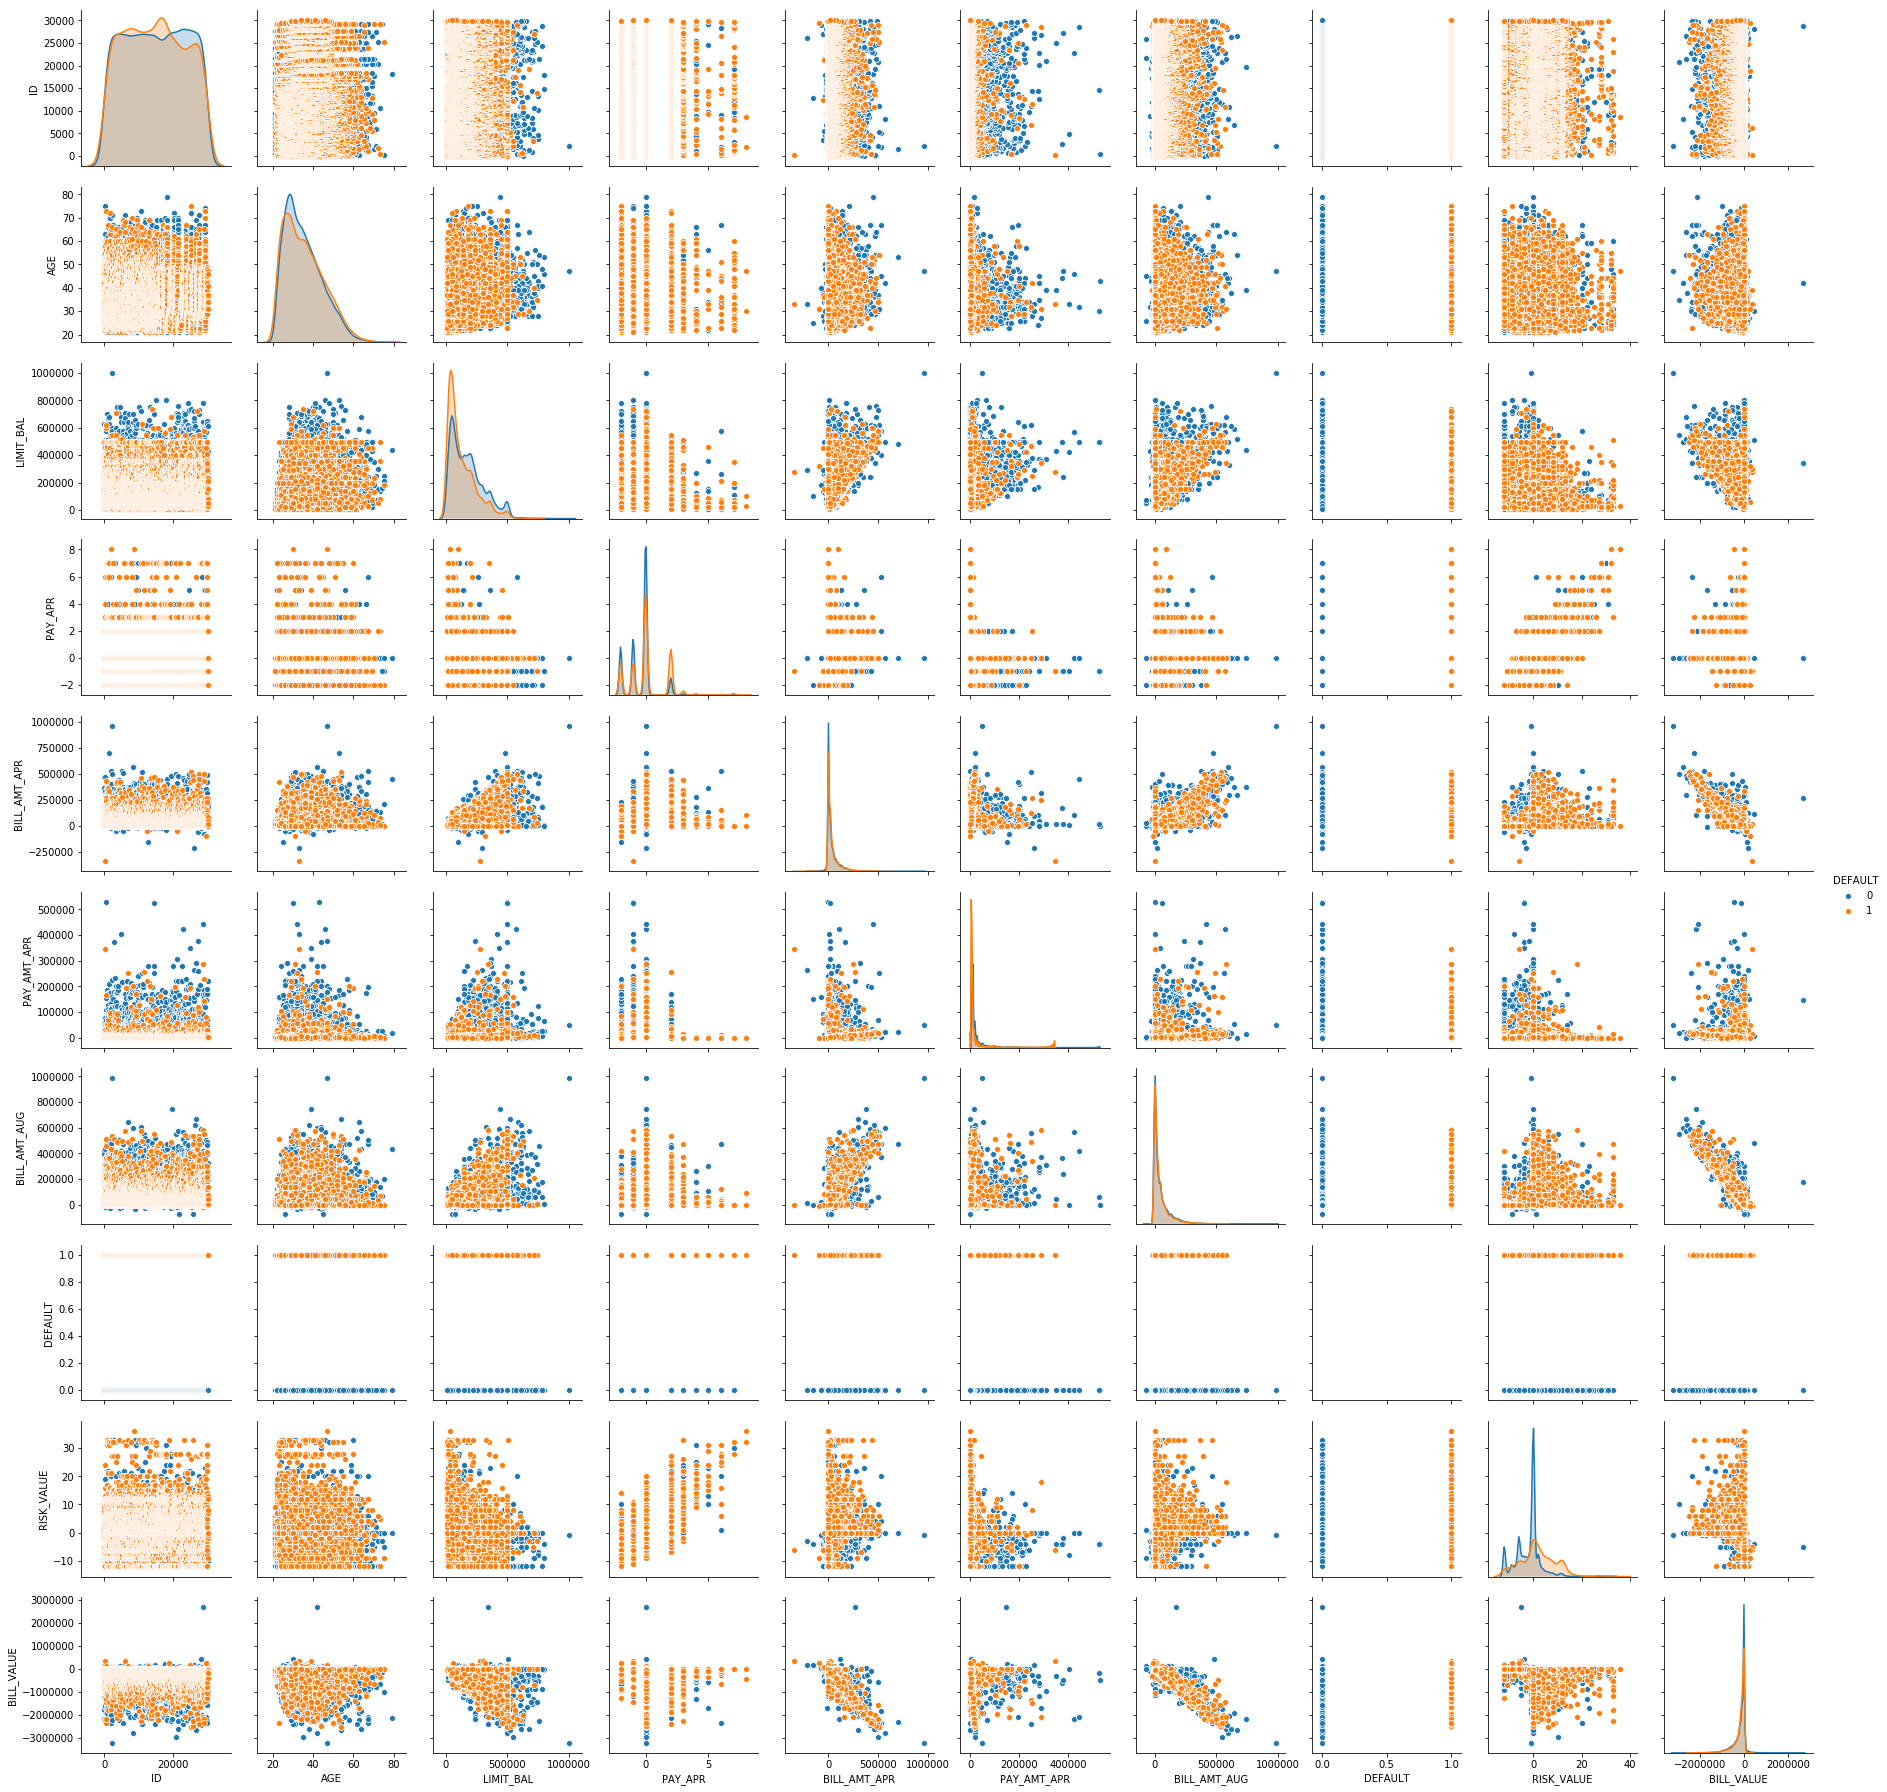

In [14]:
#sns.pairplot(df_c,hue="DEFAULT")

##   PAY_APR COLUMN

### Univariate Analysis

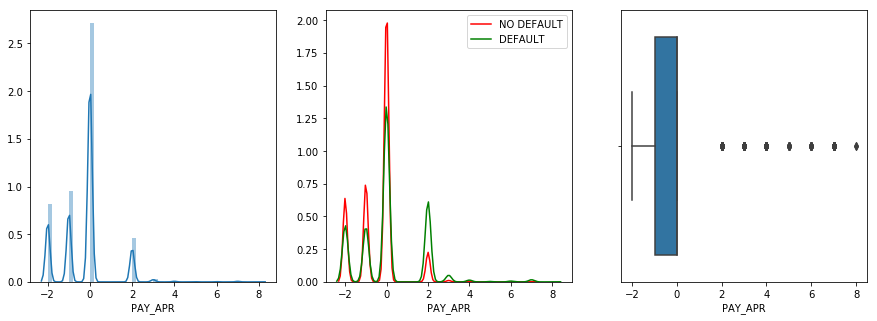

In [93]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(df['PAY_APR'])
plt.subplot(1,3,2)
sns.distplot(df[df['DEFAULT']==0]['PAY_APR'],color='r',hist=False,label='NO DEFAULT')
sns.distplot(df[df['DEFAULT']==1]['PAY_APR'],color='g',hist=False,label='DEFAULT')
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(df['PAY_APR'])


In [94]:
# Percentage of values in PAY_APR COLUMN:
print("% of values \n")
for i in df['PAY_APR'].unique():
    print( 'Value',i,' :',round(df[df['PAY_APR']==i]['PAY_APR'].count()/df['PAY_APR'].count()*100,2),'%')

% of values 

Value -2  : 16.32 %
Value 2  : 9.22 %
Value 0  : 54.29 %
Value -1  : 19.13 %
Value 3  : 0.61 %
Value 6  : 0.06 %
Value 4  : 0.16 %
Value 7  : 0.15 %
Value 8  : 0.01 %
Value 5  : 0.04 %


In [13]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEP',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'DEFAULT', 'RISK_VALUE',
       'BILL_VALUE'],
      dtype='object')

In [14]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT,RISK_VALUE,BILL_VALUE
0,1,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,-3102
1,2,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,-11395
2,3,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,-66396
3,4,50000,Female,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,-176956
4,5,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,-42352


In [23]:
df.PAY_APR.skew() , df.PAY_APR.kurt()

(0.948029391555358, 3.426534130386934)

In [95]:
df['UTILISATION_APR']=df['BILL_AMT_APR']/df["LIMIT_BAL"]*100

In [97]:
df['UTILISATION_APR']

0          0.000000
1          2.717500
2         17.276667
3         59.094000
4         38.262000
5         40.048000
6         94.788800
7          0.567000
8          2.656429
9         69.560000
10         1.865500
11         5.256923
12         0.455556
13        52.705714
14        22.204800
15        60.422000
16        95.520000
17        61.124687
18         0.000000
19         0.000000
20         0.715385
21         0.263333
22        65.731429
23         0.000000
24         9.213333
25        60.092000
26        -0.315000
27        39.234000
28         0.514000
29        22.800000
            ...    
29970      5.413056
29971     92.015000
29972     78.148421
29973      0.000000
29974      2.648000
29975      0.829091
29976    117.335000
29977     35.227143
29978     67.959677
29979      0.000000
29980     39.388000
29981     29.294000
29982     15.921111
29983      8.595000
29984     11.063333
29985      0.000000
29986      0.000000
29987     74.886923
29988     71.874800


In [98]:
df.corr()

,ID,LIMIT_BAL,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT,RISK_VALUE,BILL_VALUE,UTILISATION_APR
ID,1.000000,0.026179,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952,-0.020632,-0.021560,0.005367
LIMIT_BAL,0.026179,1.000000,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520,-0.316961,-0.256283,-0.323350
AGE,0.018678,0.144713,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890,-0.058217,-0.049160,-0.048294
PAY_SEP,-0.030575,-0.271214,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794,0.741345,-0.219259,0.378098
PAY_AUG,-0.011215,-0.296382,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551,0.850428,-0.263056,0.450362
PAY_JUL,-0.018494,-0.286123,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253,0.878080,-0.262539,0.449792
PAY_JUN,-0.002735,-0.267460,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614,0.890987,-0.271192,0.469228
PAY_MAY,-0.022199,-0.249411,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149,0.877502,-0.282934,0.488806
PAY_APR,-0.020270,-0.235195,-0.048773,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,0.207373,0.226924,0.241181,0.266356,0.290894,0.285091,-0.001496,-0.005223,0.005834,0.019018,-0.046434,-0.025299,0.186866,0.830272,-0.286770,0.512014
BILL_AMT_SEP,0.019389,0.285430,0.056239,0.187068,0.234887,0.208473,0.202812,0.206684,0.207373,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341,-0.019644,0.246179,-0.912172,0.394417


In [99]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEP',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'DEFAULT', 'RISK_VALUE',
       'BILL_VALUE', 'UTILISATION_APR'],
      dtype='object')

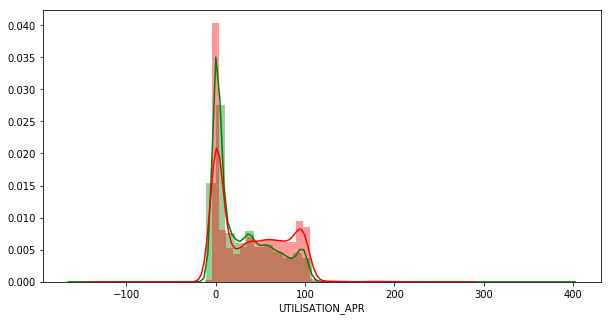

In [102]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['DEFAULT']==0]['UTILISATION_APR'],color='g',label='No Defaulter')
sns.distplot(df[df['DEFAULT']==1]['UTILISATION_APR'],color='r',label='Defaulter')


In [104]:
df['UTILISATION _%'].describe()

KeyError: 'UTILISATION _%'

In [105]:
corr=df.corr()

In [70]:
df_c

,ID,AGE,LIMIT_BAL,PAY_APR,BILL_AMT_APR,PAY_AMT_APR,BILL_AMT_AUG,DEFAULT,RISK_VALUE,BILL_VALUE,UTILISATION_APR
0,1,24,20000,-2,0,0,3102,1,-2,-3102,0.000000
1,2,26,120000,2,3261,2000,1725,1,3,-11395,2.717500
2,3,34,90000,0,15549,5000,14027,0,0,-66396,17.276667
3,4,37,50000,0,29547,1000,48233,0,0,-176956,59.094000
4,5,57,50000,0,19131,679,5670,0,-2,-42352,38.262000
5,6,37,50000,0,20024,800,57069,0,0,-166742,40.048000
6,7,29,500000,0,473944,13770,412023,0,0,-2189641,94.788800
7,8,23,100000,-1,567,1542,380,0,-3,1639,0.567000
8,9,28,140000,0,3719,1000,14096,0,2,-48166,2.656429
9,10,35,20000,-1,13912,0,0,0,-10,-12790,69.560000


In [67]:
corr['UTILISATION_APR']

ID                 0.005367
AGE               -0.048294
LIMIT_BAL         -0.323350
PAY_APR            0.512014
BILL_AMT_APR       0.569932
PAY_AMT_APR       -0.036708
BILL_AMT_AUG       0.423299
DEFAULT            0.123373
RISK_VALUE         0.541948
BILL_VALUE        -0.516605
UTILISATION _%     1.000000
UTILISATION_%      1.000000
UTILISATION_APR    1.000000
Name: UTILISATION_APR, dtype: float64

In [110]:
# Anova test

model = ols('UTILISATION_APR~DEFAULT', data = df).fit()
sms.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
DEFAULT,1.0,5.444339e+05,544433.918254,463.657005,4.566195e-102
Residual,29998.0,3.522416e+07,1174.216958,NaN,NaN


In [111]:
df[df['UTILISATION_APR']==388.555]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT,RISK_VALUE,BILL_VALUE,UTILISATION_APR
3796,3797,20000,Female,University,Single,32,0,0,0,0,0,0,129106,127610,107828,102937,98525,77711,4420,3650,3120,3200,2900,2000,0,0,-497321,388.555


In [112]:
df[df['UTILISATION_APR']>70]['DEFAULT'].value_counts(normalize = True)

0    0.673558
1    0.326442
Name: DEFAULT, dtype: float64

In [107]:
df.iloc[3796]

ID                       3797
LIMIT_BAL               20000
SEX                    Female
EDUCATION          University
MARRIAGE               Single
AGE                        32
PAY_SEP                     0
PAY_AUG                     0
PAY_JUL                     0
PAY_JUN                     0
PAY_MAY                     0
PAY_APR                     0
BILL_AMT_SEP           129106
BILL_AMT_AUG           127610
BILL_AMT_JUL           107828
BILL_AMT_JUN           102937
BILL_AMT_MAY            98525
BILL_AMT_APR            77711
PAY_AMT_SEP              4420
PAY_AMT_AUG              3650
PAY_AMT_JUL              3120
PAY_AMT_JUN              3200
PAY_AMT_MAY              2900
PAY_AMT_APR              2000
DEFAULT                     0
RISK_VALUE                  0
BILL_VALUE            -497321
UTILISATION_APR       388.555
Name: 3796, dtype: object

In [108]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEP',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'DEFAULT', 'RISK_VALUE',
       'BILL_VALUE', 'UTILISATION_APR'],
      dtype='object')

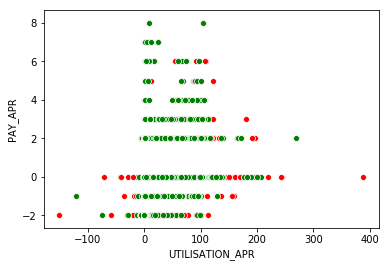

In [113]:
sns.scatterplot(df[df['DEFAULT']==0]['UTILISATION_APR'],df[df['DEFAULT']==0]['PAY_APR'],data=df,color='r')
sns.scatterplot(df[df['DEFAULT']==1]['UTILISATION_APR'],df[df['DEFAULT']==1]['PAY_APR'],data=df,color='g')

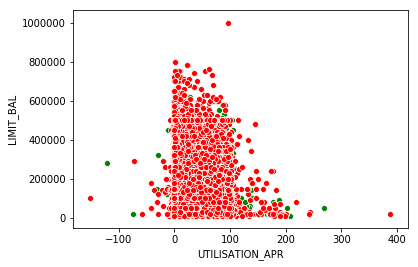

In [114]:
sns.scatterplot(df[df['DEFAULT']==1]['UTILISATION_APR'],df[df['DEFAULT']==1]['LIMIT_BAL'],data=df,color='g')
sns.scatterplot(df[df['DEFAULT']==0]['UTILISATION_APR'],df[df['DEFAULT']==0]['LIMIT_BAL'],data=df,color='r')

In [115]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT,RISK_VALUE,BILL_VALUE,UTILISATION_APR
0,1,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,-3102,0.000000
1,2,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,-11395,2.717500
2,3,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,-66396,17.276667
3,4,50000,Female,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,-176956,59.094000
4,5,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,-42352,38.262000


In [156]:
df['SPEND_STATUS']=(df['LIMIT_BAL'])-((df['BILL_AMT_APR']+df['BILL_AMT_MAY']+df['BILL_AMT_JUN']+df['BILL_AMT_JUL']+df['BILL_AMT_AUG']+df['BILL_AMT_SEP'])/6)-((df['PAY_AMT_APR']+df['PAY_AMT_MAY']+df['PAY_AMT_JUN']+df['PAY_AMT_JUL']+df['PAY_AMT_AUG']+df['PAY_AMT_SEP'])/6)

In [157]:
df['SPEND_STATUS'].describe()

count     30000.000000
mean     117232.145372
std      124475.756280
min     -469436.333333
25%       16897.666667
50%       70077.500000
75%      191592.375000
max      787826.666667
Name: SPEND_STATUS, dtype: float64

In [158]:
df['SPEND_STATUS']

0         18601.166667
1        116320.500000
2         71221.500000
3         10046.333333
4         21935.333333
5          9019.000000
6         15774.333333
7         96953.833333
8        128004.500000
9         13158.666667
10       193176.833333
11       234220.500000
12       619270.500000
13        11769.166667
14       184734.833333
15        16230.666667
16         1248.166667
17        98681.500000
18       360000.000000
19       180000.000000
20       102314.333333
21       119420.666667
22        23919.166667
23       441741.000000
24        81956.000000
25        12969.000000
26        59649.000000
27        30103.333333
28        36704.166667
29        32719.666667
             ...      
29970    295052.166667
29971      8045.333333
29972    116649.166667
29973    230000.000000
29974     44116.166667
29975    203866.166667
29976    -12588.166667
29977    273540.166667
29978     74654.833333
29979    180000.000000
29980      6492.833333
29981     20056.000000
29982     7

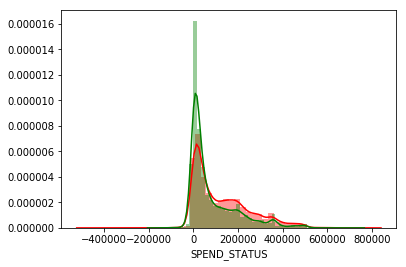

In [159]:
sns.distplot(df[df['DEFAULT']==0]['SPEND_STATUS'],color='r')
sns.distplot(df[df['DEFAULT']==1]['SPEND_STATUS'],color='g')

In [160]:
df['OUTSTANDING']=df['LIMIT_BAL']-df['SPEND_STATUS']

In [161]:
df['OUTSTANDING']

0          1398.833333
1          3679.500000
2         18778.500000
3         39953.666667
4         28064.666667
5         40981.000000
6        484225.666667
7          3046.166667
8         11995.500000
9          6841.333333
10         6823.166667
11        25779.500000
12        10729.500000
13        58230.833333
14        65265.166667
15        33769.333333
16        18751.833333
17       221318.500000
18            0.000000
19            0.000000
20        27685.666667
21          579.333333
22        46080.833333
23         8259.000000
24         8044.000000
25        37031.000000
26          351.000000
27        19896.666667
28        13295.833333
29        17280.333333
             ...      
29970     64947.833333
29971     71954.666667
29972     73350.833333
29973         0.000000
29974      5883.833333
29975     16133.833333
29976     52588.166667
29977    146459.833333
29978    235345.166667
29979         0.000000
29980     43507.166667
29981     29944.000000
29982     1

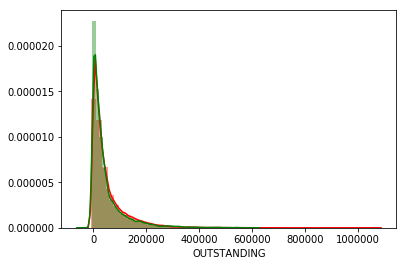

In [162]:
sns.distplot(df[df['DEFAULT']==0]['OUTSTANDING'],color='r')
sns.distplot(df[df['DEFAULT']==1]['OUTSTANDING'],color='g')

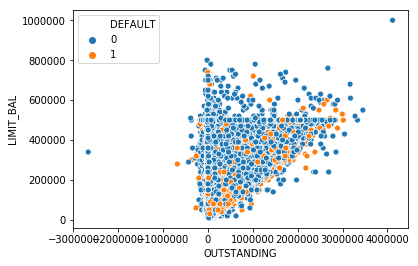

In [155]:
sns.scatterplot('OUTSTANDING','LIMIT_BAL',data=df,hue='DEFAULT')

In [173]:
df['Avg_exp_5'] = ((df['BILL_AMT_MAY'] - (df['BILL_AMT_APR'] - df['PAY_AMT_MAY']))) / df['LIMIT_BAL']*100

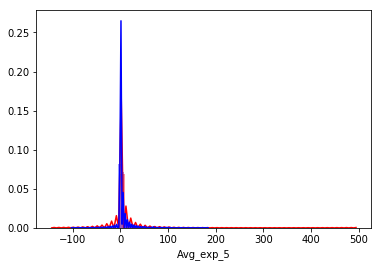

In [174]:
sns.distplot(df[df['DEFAULT']==0]['Avg_exp_5'],color='r')
sns.distplot(df[df['DEFAULT']==1]['Avg_exp_5'],color='b')

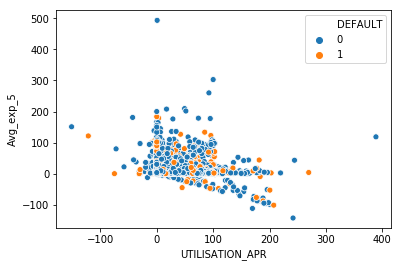

In [175]:
sns.scatterplot('UTILISATION_APR','Avg_exp_5',data=df,hue='DEFAULT')

In [176]:
df['Avg_exp_5']

0         0.000000
1         0.161667
2         0.443333
3         0.962000
4         1.408000
5         1.190000
6         4.561800
7         0.961000
8         6.481429
9         1.085000
10        0.917500
11        3.315000
12        1.031746
13        1.061429
14        1.745200
15        1.240000
16        2.255000
17        1.830000
18        0.000000
19        0.000000
20        9.078462
21        0.526667
22        1.275714
23        0.000000
24        0.125556
25        1.690000
26        0.526667
27        0.628000
28       60.860000
29       17.150000
           ...    
29970     2.436944
29971     1.447500
29972    10.324211
29973     0.000000
29974     2.522000
29975     0.799545
29976     9.342500
29977     0.591667
29978     4.485484
29979     0.000000
29980     9.554000
29981    17.064000
29982     0.230000
29983    46.700000
29984     6.356667
29985     0.000000
29986     0.000000
29987     1.063077
29988     0.927200
29989     0.000000
29990     3.967143
29991     0.

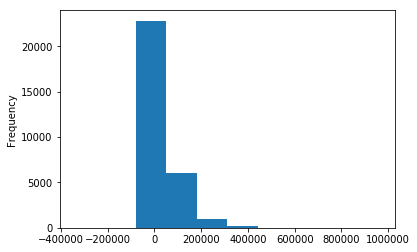

In [189]:
df['BILL_AMT_APR'].plot(kind='hist')

In [192]:
df['BILL_AMT_APR']=df['BILL_AMT_APR']+0.0001

In [194]:
xt,lam=stats.boxcox(df['BILL_AMT_APR'])

ValueError: Data must be positive.

In [187]:
df['BILL_AMT_APR']

0        6.504128
1        6.504128
2        6.504128
3        6.504128
4        6.504128
5        6.504128
6        6.504128
7        6.504128
8        6.504128
9        6.504128
10       6.504128
11       6.504128
12       6.504128
13       6.504128
14       6.504128
15       6.504128
16       6.504128
17       6.504128
18       6.504128
19       6.504128
20       6.504128
21       6.504128
22       6.504128
23       6.504128
24       6.504128
25       6.504128
26       6.504128
27       6.504128
28       6.504128
29       6.504128
           ...   
29970    6.504128
29971    6.504128
29972    6.504128
29973    6.504128
29974    6.504128
29975    6.504128
29976    6.504128
29977    6.504128
29978    6.504128
29979    6.504128
29980    6.504128
29981    6.504128
29982    6.504128
29983    6.504128
29984    6.504128
29985    6.504128
29986    6.504128
29987    6.504128
29988    6.504128
29989    6.504128
29990    6.504128
29991    6.504128
29992    6.504128
29993    6.504128
29994    6